#Week2 機械学習のための数学

##●富士山下山問題


標高データの取得
標高データにアクセスし、パスワード入力欄に1632を入力します。
アクセス先からmtfuji_data.csvをダウンロードしてください。


以下のコードを実行し、ダウンロードしたmtfuji_data.csvを読み込みます。
一部を出力させると、以下のような中身になっています。

In [1]:
import numpy as np

#google driveのモジュールをインポート
from google.colab import drive
#google driveのマウント
drive.mount('/content/drive')



csv_path = "drive/My Drive/DIVE INTO CODE/Week2/mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])

Mounted at /content/drive
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


###【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

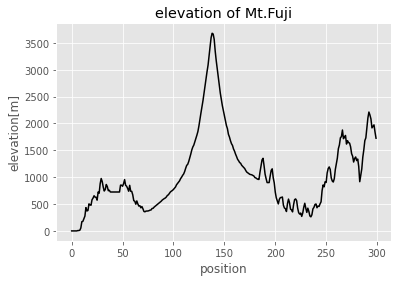

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

#サブプロット作成
fig, ax = plt.subplots()

#富士山の断面図を表示
ax.set_title("elevation of Mt.Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation[m]")
ax.plot(fuji[:, 0], fuji[:, 3], color = "black", label = "Diagram of Mt.Fuji")

###【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [3]:
def compute_current_gradient(arg_current_pos = 1):
    '''
    #Description
        現在の地点の勾配を算出する関数。
    #Parameters
        arg_current_pos:    現在地の位置番号。（= mtfuji_data.csvのx列の番号）
    #Returns
        ret_current_gradient:    現在地の勾配。(= 現在地と１つ前の地点の標高差)
    '''
    if(arg_current_pos < 1):
        print("Invalid current_pos is given. Please input more than 1.")
        ret_current_gradient = 0
    else:
        ret_current_gradient = fuji[arg_current_pos, 3] - fuji[arg_current_pos - 1, 3]
    return ret_current_gradient

current_pos = 7
print("現在地(x={})の勾配: {:.2f}".format(current_pos, compute_current_gradient(current_pos)))

現在地(x=7)の勾配: 0.59


###【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

In [4]:
def compute_next_pos(arg_current_pos = 1, arg_learning_rate = 0.2):
    '''
    #Description
        移動先の地点の位置を算出する関数。
    #Parameters
        arg_current_pos:    現在地の位置番号。（= mtfuji_data.csvのx列の番号）
        arg_learning_rate:  学習率
    #Returns
        ret_next_pos:    移動先の地点の位置番号。
    '''

    #現在地の勾配を基に、移動先の地点(小数点以下は四捨五入)を算出。
    ret_next_pos = round(arg_current_pos - arg_learning_rate * compute_current_gradient(arg_current_pos))

    if(ret_next_pos < 0):
        #移動先の地点は0以上である必要があるため、0をセット。
        ret_next_pos = 0
    elif(ret_next_pos > 299):
        #移動先の地点は299以下である必要があるため、299をセット。
        ret_next_pos = 299
    return ret_next_pos

learning_rate = 0.2   #学習率を0.2に設定
current_pos = 7
print("現在地(x={})の移動先の地点: {}".format(current_pos, compute_next_pos(current_pos, learning_rate)))

現在地(x=7)の移動先の地点: 7


###【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。


《実装上の注意》


問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [5]:
def exec_downhill(arg_initial_pos = 136, arg_loop_max_num = 100, arg_learning_rate = 0.2):
    '''
    #Description
        下山する関数。
    #Parameters
        arg_initial_pos:    初期位置の位置番号。（= mtfuji_data.csvのx列の番号）
        arg_loop_max_num:   移動先の計算回数上限（計算が無限に続いてしまう問題への対策）
        arg_learning_rate:  学習率
    #Returns
        ret_log_ndarray:    下山ログ。下山開始～完了までの各地点の位置番号、標高、および勾配を記録した(n, 3)行列の配列。
        ret_give_up_flg:    下山を断念したか否かを示すフラグ。移動先の計算回数が上限に達した場合にTrueをセット。
    '''
    temp_current_pos = arg_initial_pos    #現在位置を初期値に設定
    temp_loop_num = 0     #現在のループ回数
    #現在地の位置番号と標高と勾配を下山ログに格納
    ret_log_ndarray = np.array([[temp_current_pos, fuji[temp_current_pos, 3], compute_current_gradient(temp_current_pos)]])


    #下山完了するまでループ
    while(True):
        #移動先の位置番号を取得。
        temp_next_pos = compute_next_pos(temp_current_pos, arg_learning_rate)
        temp_loop_num += 1
        if(temp_next_pos == temp_current_pos):
            #現在位置と移動先の位置番号が一致したため、下山完了（GiveUpフラグをFalseにセット）
            ret_give_up_flg = False
            break
        if(temp_loop_num > arg_loop_max_num):
            #ループ回数が上限に達したため、下山を中断（GiveUpフラグをTrueにセット）
            ret_give_up_flg = True
            break
        else:
            #下山継続
            temp_current_pos = temp_next_pos    #現在位置を更新
            #現在地の位置番号と標高と勾配を下山ログに格納
            ret_log_ndarray = np.append(ret_log_ndarray, [[temp_current_pos, fuji[temp_current_pos, 3], compute_current_gradient(temp_current_pos)]], axis = 0)
    return ret_log_ndarray, ret_give_up_flg

np.set_printoptions(threshold=100)   #print表示での配列の省略：有り（閾値=100）

current_pos = 136
loop_max_num = 100
log_ndarray, give_up_flg = exec_downhill(current_pos, loop_max_num)
print("現在地(x={})から下山開始:".format(current_pos))
print("(位置番号x, 標高[m], 勾配)\n{}".format(log_ndarray))
if(give_up_flg == True):
    print("Warning: 移動先の計算が完了しなかったため、下山を断念!!")

現在地(x=136)から下山開始:
(位置番号x, 標高[m], 勾配)
[[ 136.   3434.59  168.35]
 [ 102.    817.62   22.37]
 [  98.    741.17   15.45]
 [  95.    672.36   11.93]
 [  93.    631.71   18.67]
 [  89.    575.07   21.43]
 [  85.    505.1    16.7 ]
 [  82.    458.66   15.66]
 [  79.    418.41   28.27]
 [  73.    368.91   13.23]
 [  70.    412.27  -41.94]
 [  78.    390.14    3.5 ]
 [  77.    386.64    9.02]
 [  75.    371.19    0.15]]


###【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》


断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

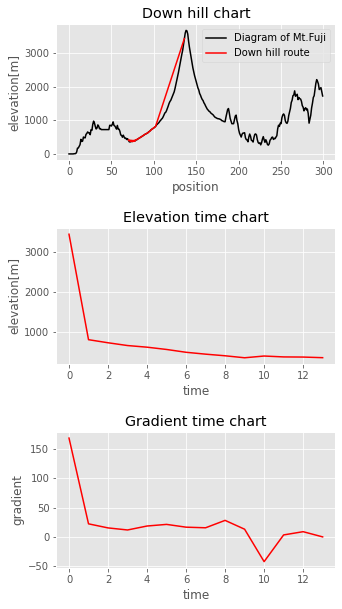

In [6]:
#サブプロット作成
fig2, ax2 = plt.subplots(3)

fig2.subplots_adjust(wspace=0.4, hspace=0.5)    #グラフ同士の間隔を指定
fig2.set_size_inches(5, 10)   #グラフのサイズを指定

#富士山の断面図中に下山の軌跡を表示
ax2[0].set_title("Down hill chart")
ax2[0].set_xlabel("position")
ax2[0].set_ylabel("elevation[m]")
ax2[0].plot(fuji[:, 0], fuji[:, 3], color = "black", label = "Diagram of Mt.Fuji")
ax2[0].plot(log_ndarray[:, 0], log_ndarray[:, 1], color = "red", label = "Down hill route")
ax2[0].legend(loc='best') # 凡例を表示

#標高の時系列データ
ax2[1].set_title("Elevation time chart")
ax2[1].set_xlabel("time")
ax2[1].set_ylabel("elevation[m]")
ax2[1].plot(log_ndarray[:, 1], color = "red")

#勾配の時系列データ
ax2[2].set_title("Gradient time chart")
ax2[2].set_xlabel("time")
ax2[2].set_ylabel("gradient")
ax2[2].plot(log_ndarray[:, 2], color = "red")

###【問題6】初期値の変更
問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。具体的には、「今いる地点」を変更できるようにするということ

In [7]:
loop_max_num = 100

for current_pos in range(1, 300):
    log_ndarray, give_up_flg = exec_downhill(current_pos, loop_max_num)    
    print("現在地(x={})から下山開始:".format(current_pos))
    print("(位置番号x, 標高[m], 勾配)\n{}".format(log_ndarray))
    if(give_up_flg == True):
        print("Warning: 移動先の計算が完了しなかったため、下山を断念!!")
    print("\n")

現在地(x=1)から下山開始:
(位置番号x, 標高[m], 勾配)
[[1. 0. 0.]]


現在地(x=2)から下山開始:
(位置番号x, 標高[m], 勾配)
[[2. 0. 0.]]


現在地(x=3)から下山開始:
(位置番号x, 標高[m], 勾配)
[[3. 0. 0.]]


現在地(x=4)から下山開始:
(位置番号x, 標高[m], 勾配)
[[4. 0. 0.]]


現在地(x=5)から下山開始:
(位置番号x, 標高[m], 勾配)
[[5. 0. 0.]]


現在地(x=6)から下山開始:
(位置番号x, 標高[m], 勾配)
[[6.   6.62 6.62]
 [5.   0.   0.  ]]


現在地(x=7)から下山開始:
(位置番号x, 標高[m], 勾配)
[[7.   7.21 0.59]]


現在地(x=8)から下山開始:
(位置番号x, 標高[m], 勾配)
[[ 8.   12.2   4.99]
 [ 7.    7.21  0.59]]


現在地(x=9)から下山開始:
(位置番号x, 標高[m], 勾配)
[[ 9.   54.41 42.21]
 [ 1.    0.    0.  ]]


Invalid current_pos is given. Please input more than 1.
Invalid current_pos is given. Please input more than 1.
現在地(x=10)から下山開始:
(位置番号x, 標高[m], 勾配)
[[ 10.   171.56 117.15]
 [  0.     0.     0.  ]]


Invalid current_pos is given. Please input more than 1.
Invalid current_pos is given. Please input more than 1.
現在地(x=11)から下山開始:
(位置番号x, 標高[m], 勾配)
[[ 11.   177.84   6.28]
 [ 10.   171.56 117.15]
 [  0.     0.     0.  ]]


現在地(x=12)から下山開始:
(位置番号x, 標高[m], 勾配)
[[

###【問題7】初期値ごとの下山過程の可視化
問題6では全初期値の下山過程を計算しました。そこで、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。勾配降下法において 初期値 が結果に影響を与えることが確認できます。


《初期値とは》


今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なる斜面を下ることになります。

Invalid current_pos is given. Please input more than 1.
Invalid current_pos is given. Please input more than 1.


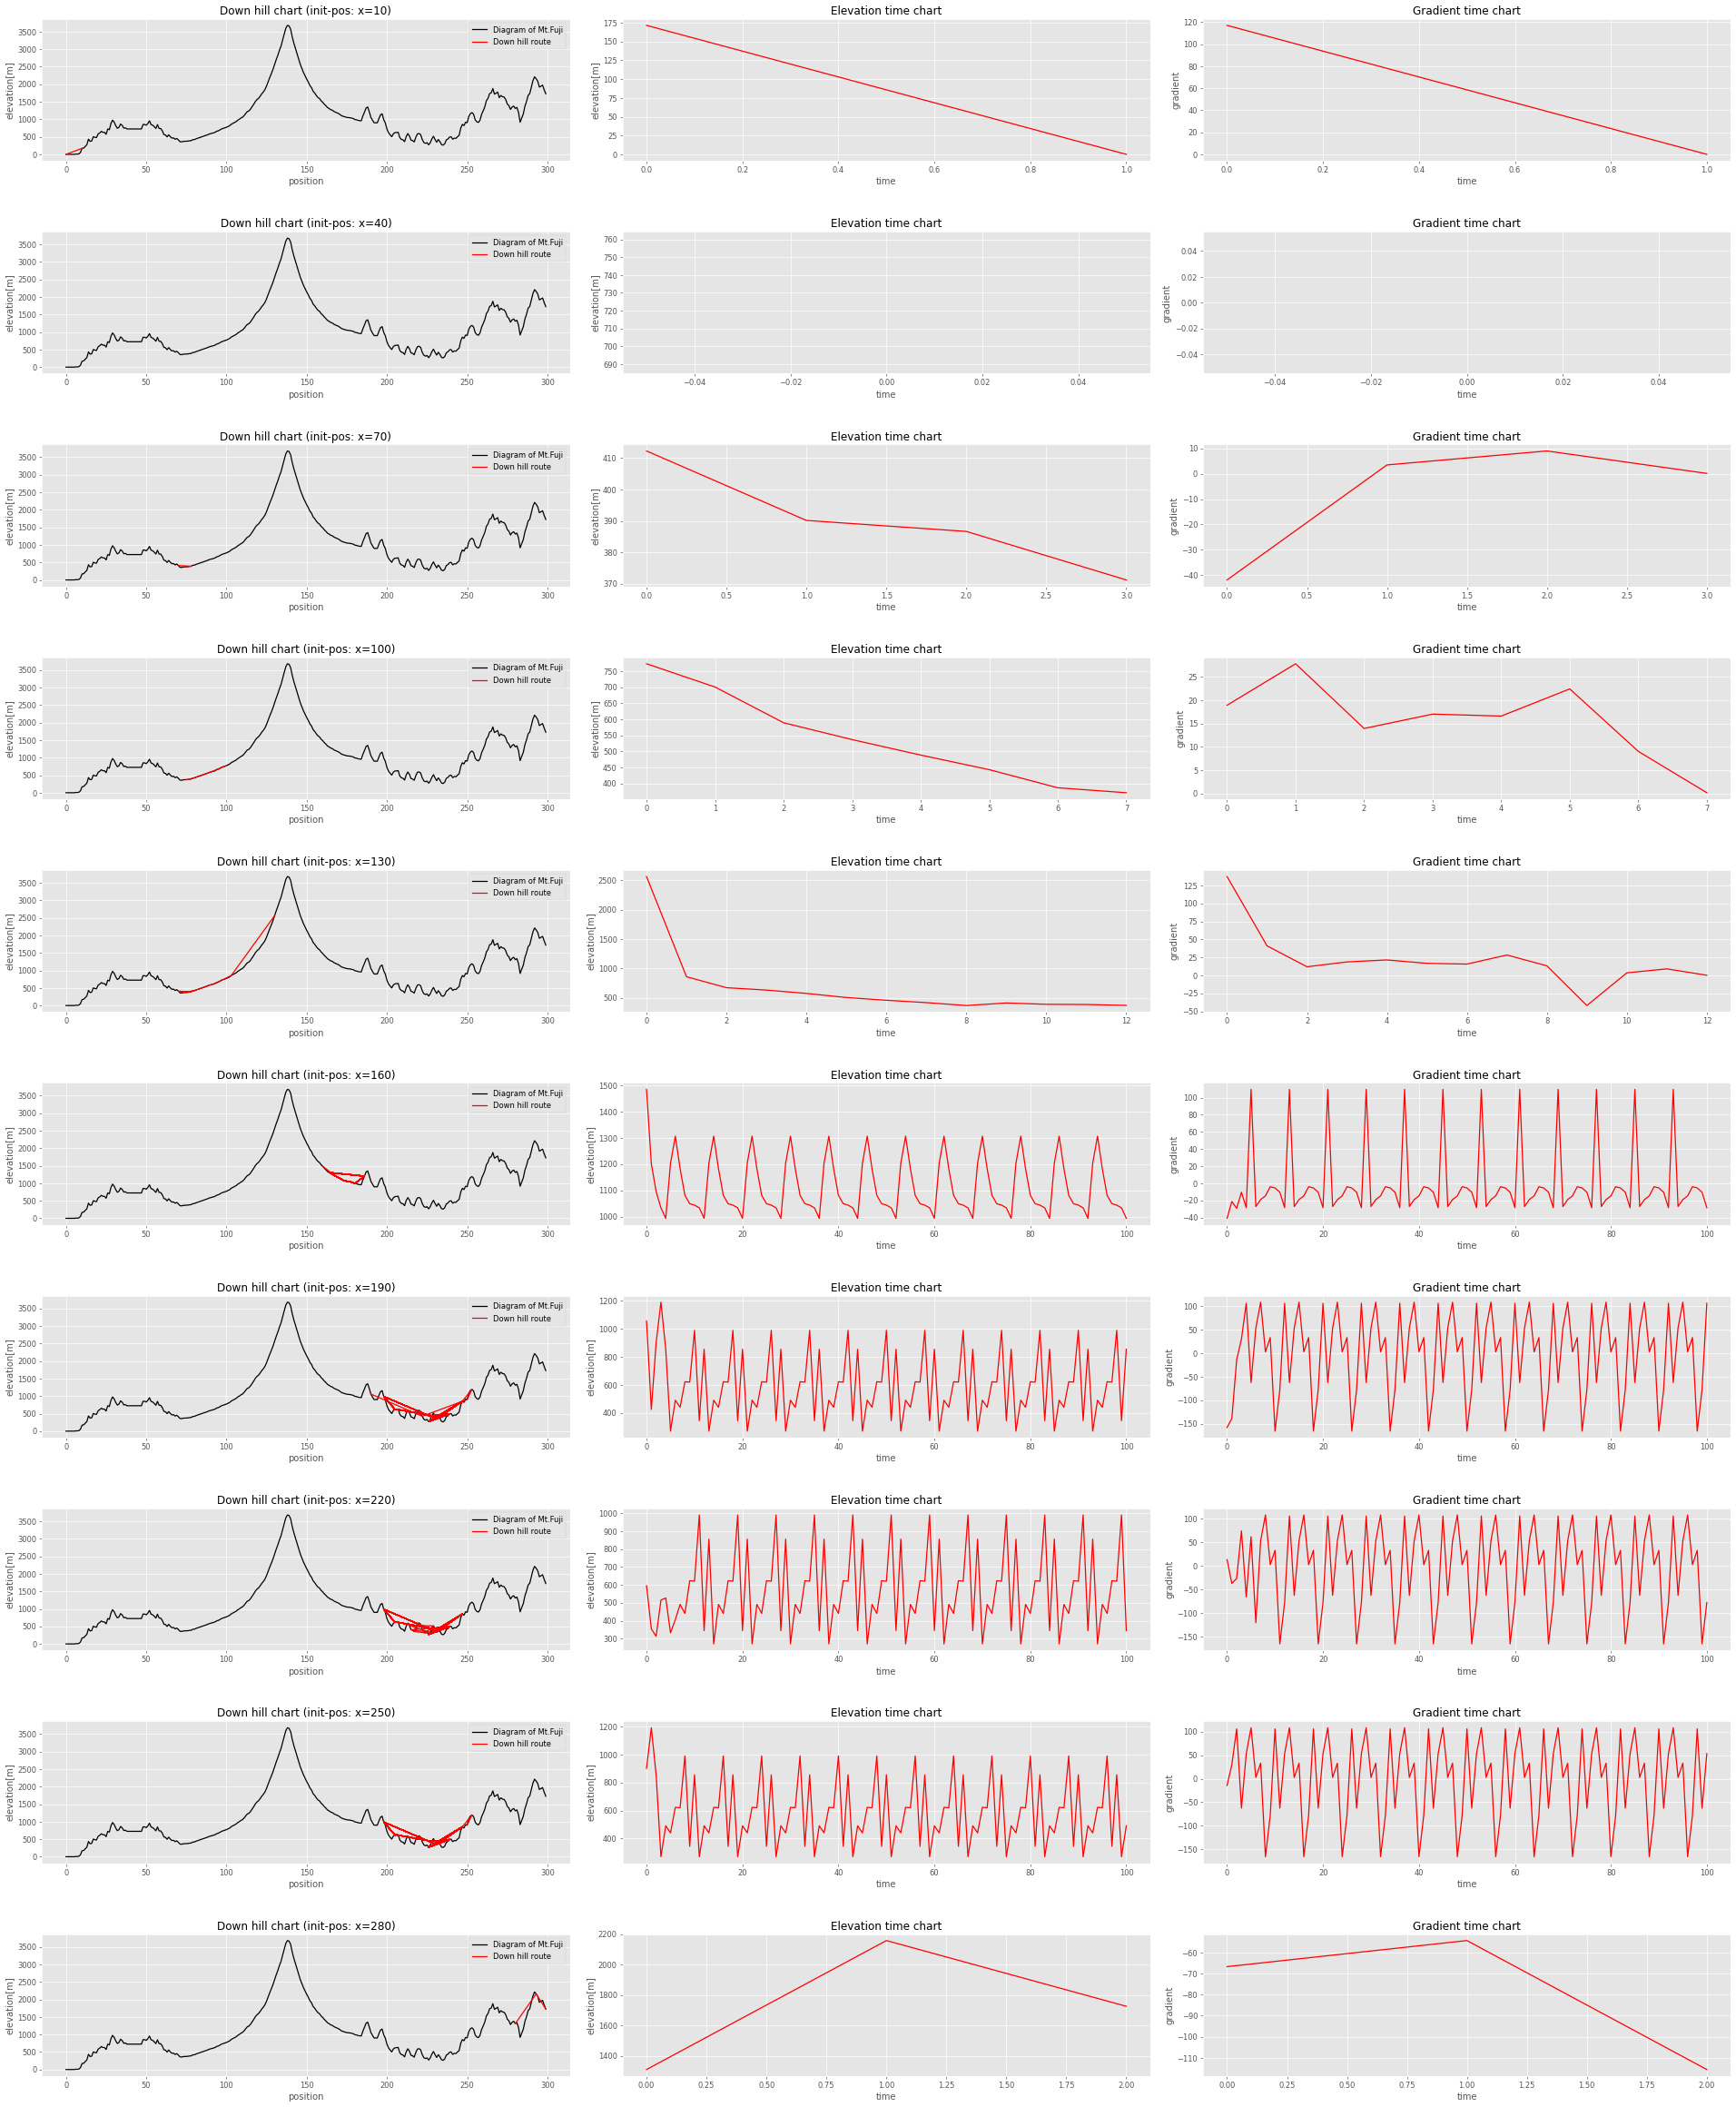

In [8]:
initial_pos_ndarray = np.arange(10, 300, 30)   #初期位置の配列（10～299の間で30間隔で設定）

#サブプロット作成
fig3, ax3 = plt.subplots(initial_pos_ndarray.size, 3, figsize=(40, 50), dpi=60)

fig3.subplots_adjust(wspace=0.1, hspace=0.5)    #グラフ同士の間隔を指定

i = 0   #axのインデックス

#for i in range(30, initial_pos_num):
for current_initial_pos in initial_pos_ndarray:
    log_ndarray, give_up_flg = exec_downhill(current_initial_pos, loop_max_num)   #現在の初期値からの下山を実行。

    #富士山の断面図中に下山の軌跡を表示
    ax3[i][0].set_title("Down hill chart (init-pos: x={})".format(current_initial_pos))
    ax3[i][0].set_xlabel("position")
    ax3[i][0].set_ylabel("elevation[m]")
    ax3[i][0].plot(fuji[:, 0], fuji[:, 3], color = "black", label = "Diagram of Mt.Fuji")
    ax3[i][0].plot(log_ndarray[:, 0], log_ndarray[:, 1], color = "red", label = "Down hill route")
    ax3[i][0].legend(loc='best') # 凡例を表示

    #標高の時系列データ
    ax3[i][1].set_title("Elevation time chart")
    ax3[i][1].set_xlabel("time")
    ax3[i][1].set_ylabel("elevation[m]")
    ax3[i][1].plot(log_ndarray[:, 1], color = "red")

    #勾配の時系列データ
    ax3[i][2].set_title("Gradient time chart")
    ax3[i][2].set_xlabel("time")
    ax3[i][2].set_ylabel("gradient")
    ax3[i][2].plot(log_ndarray[:, 2], color = "red")

    i += 1    #axのインデックスを更新

###【問題8】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

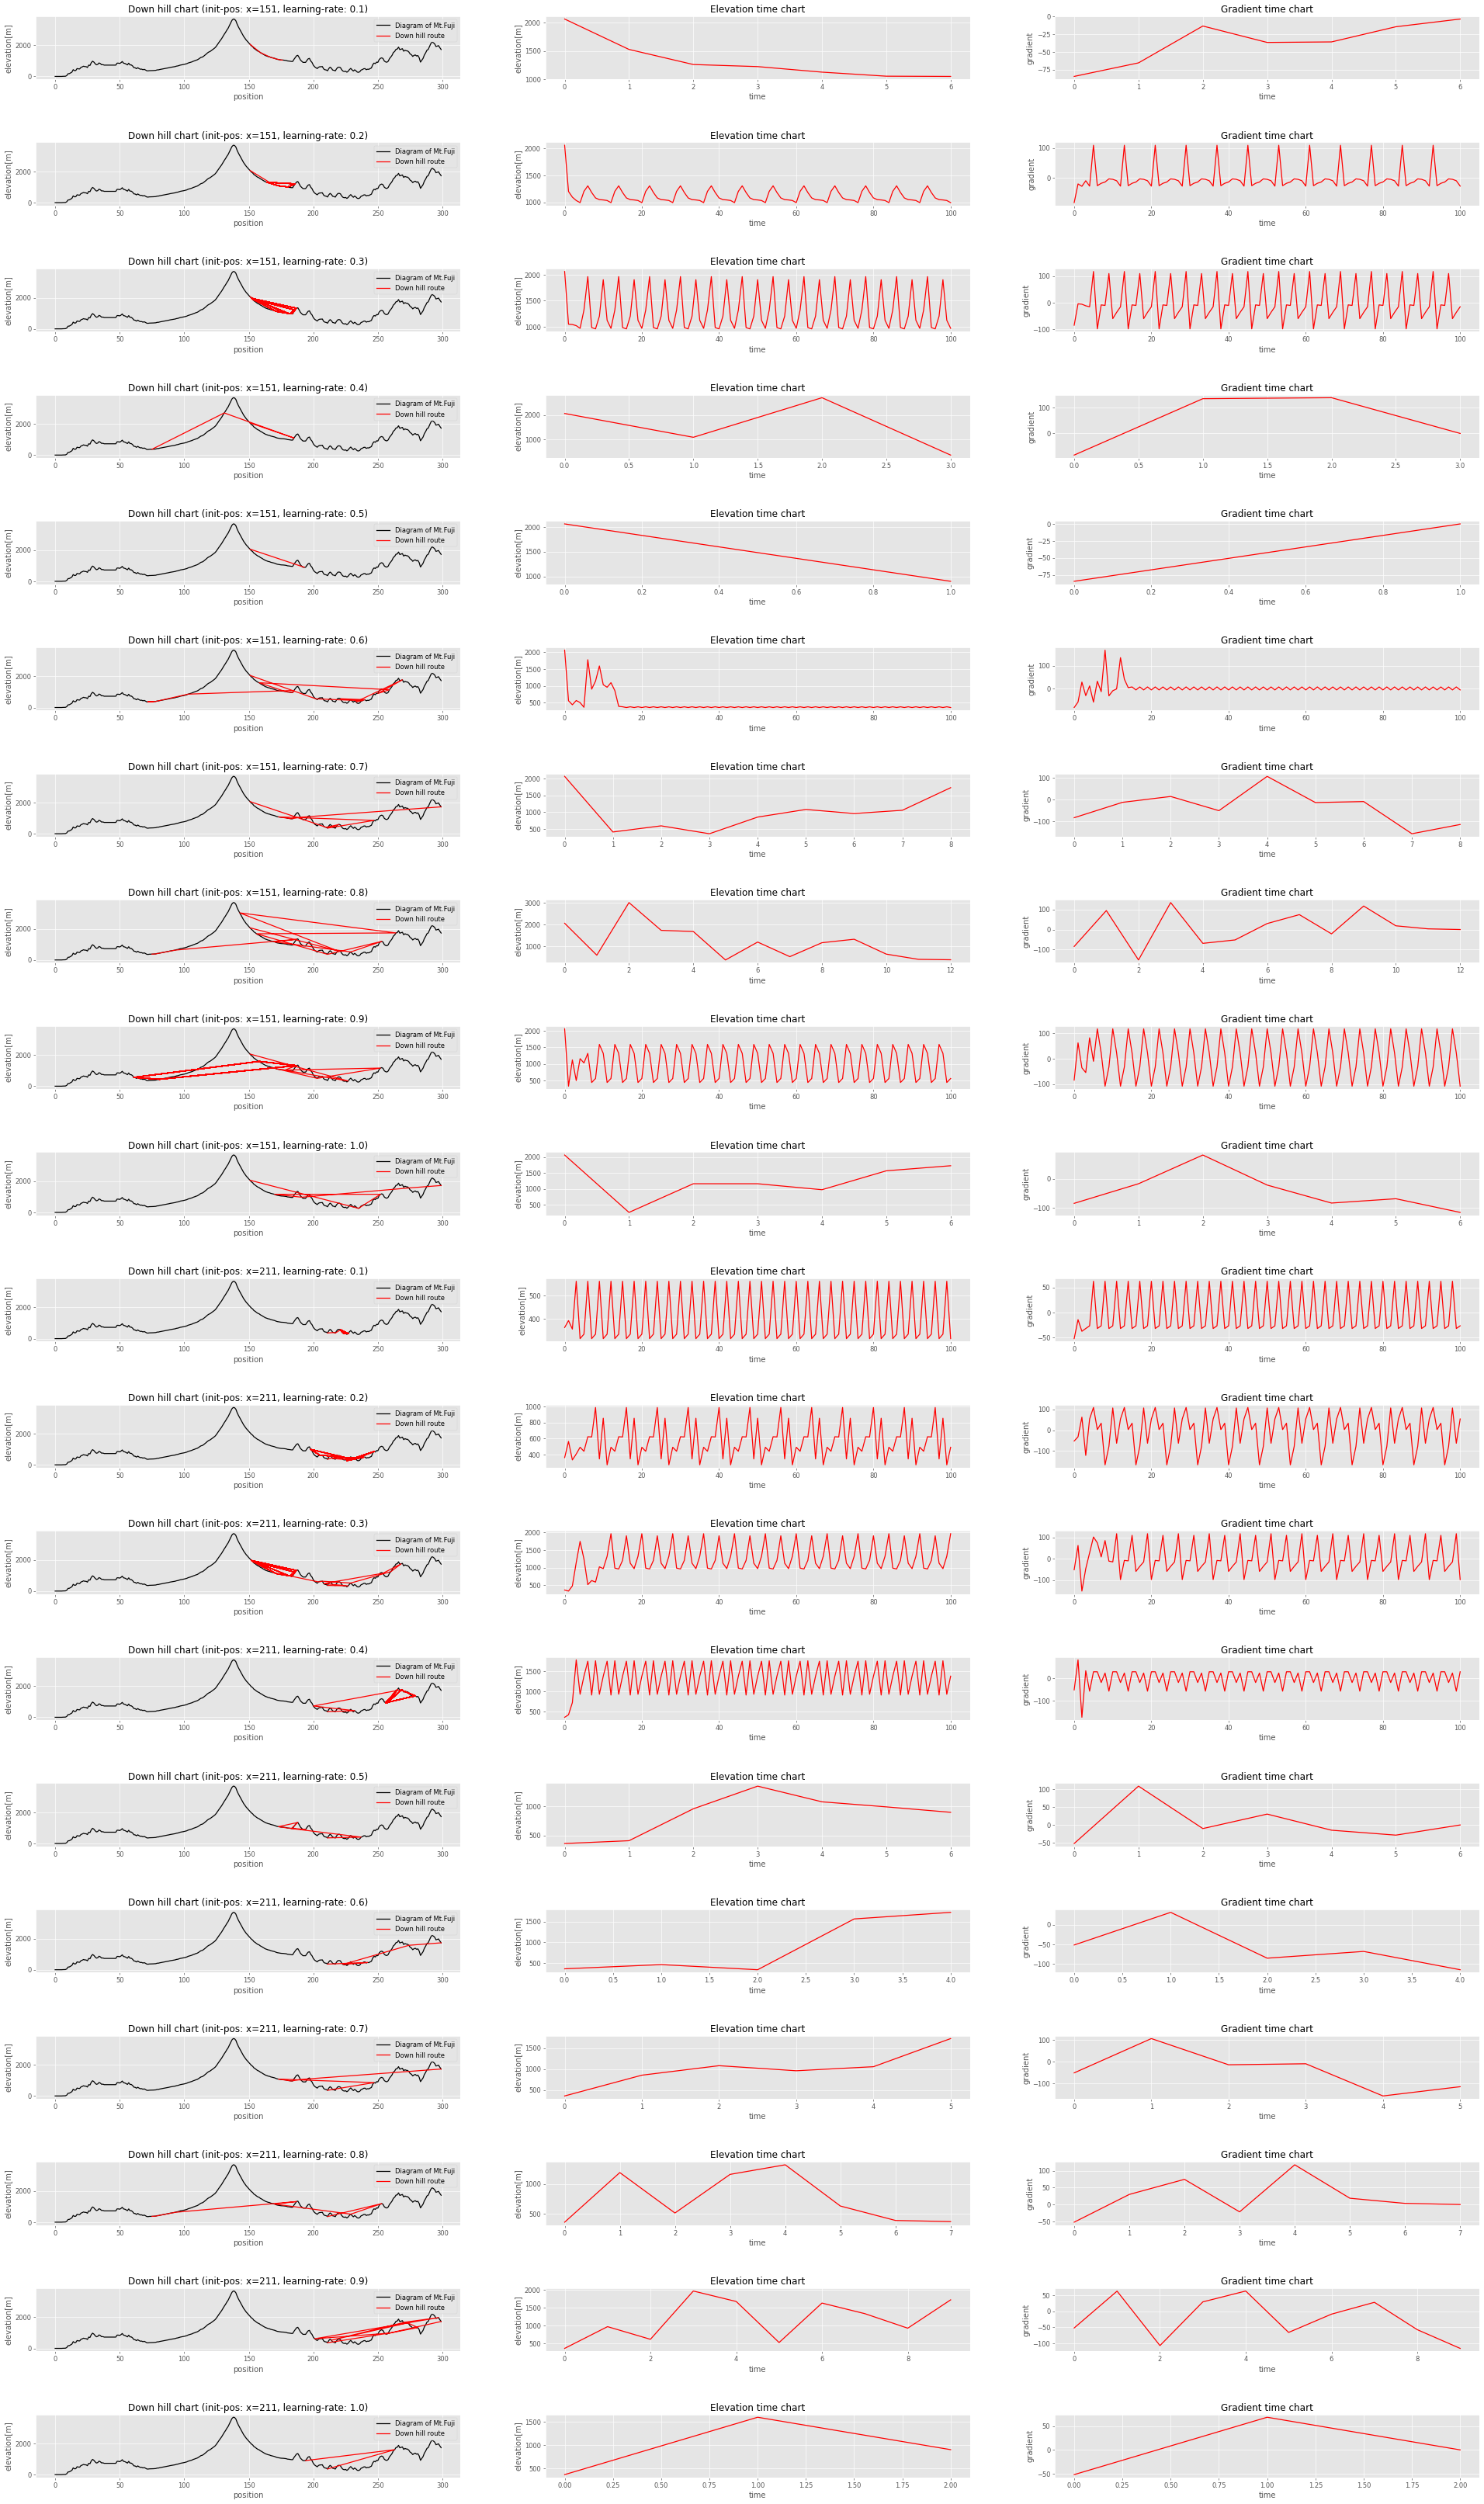

In [9]:
initial_pos_list = [151, 211]   #初期位置のリスト
learning_rate_ndarray = np.arange(0.1, 1.1, 0.1)    #学習率の配列

#サブプロット作成
fig4, ax4 = plt.subplots(len(initial_pos_list) * learning_rate_ndarray.size , 3, figsize=(40, 70), dpi=60)
fig4.subplots_adjust(hspace=1)    #グラフ同士の間隔を指定

i = 0   #axのインデックス

for current_initial_pos in initial_pos_list:    #初期位置をリスト内の各値に設定して計算
    for learning_rate in learning_rate_ndarray:    #学習率を0.1～1.0まで0.1間隔で変化させて下山
        log_ndarray, give_up_flg = exec_downhill(current_initial_pos, loop_max_num, learning_rate)   #現在の初期位置からの下山を実行

        #富士山の断面図中に下山の軌跡を表示
        ax4[i][0].set_title("Down hill chart (init-pos: x={}, learning-rate: {:.1f})".format(current_initial_pos, learning_rate))
        ax4[i][0].set_xlabel("position")
        ax4[i][0].set_ylabel("elevation[m]")
        ax4[i][0].plot(fuji[:, 0], fuji[:, 3], color = "black", label = "Diagram of Mt.Fuji")
        ax4[i][0].plot(log_ndarray[:, 0], log_ndarray[:, 1], color = "red", label = "Down hill route")
        ax4[i][0].legend(loc='best') # 凡例を表示

        #標高の時系列データ
        ax4[i][1].set_title("Elevation time chart")
        ax4[i][1].set_xlabel("time")
        ax4[i][1].set_ylabel("elevation[m]")
        ax4[i][1].plot(log_ndarray[:, 1], color = "red")

        #勾配の時系列データ
        ax4[i][2].set_title("Gradient time chart")
        ax4[i][2].set_xlabel("time")
        ax4[i][2].set_ylabel("gradient")
        ax4[i][2].plot(log_ndarray[:, 2], color = "red")

        i += 1    #axのインデックスを更新

